# Introduction

Notebook to analyse the PyBossa taskruns from the Volunteers App. The analysis made on this notebook is needed once a number of volunteers participating of the empirical study, changed during the execution time, becoming necessary to rerun some tasks to distribute more equally the amount of tasks by volunteer.

**The final amount should be around 10 tasks/volunteer.**

# Load Libraries and Data

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

In [2]:
import pandas as pd
import seaborn as sns

import modules.utils.firefox_dataset_p2 as fd

from sklearn.metrics import cohen_kappa_score

taskruns = fd.TaskRuns.read_volunteers_taskruns_df()

TaskRuns shape: (206, 11)


# Volunteers Taskruns

In [3]:
taskruns['created'] = pd.to_datetime(taskruns['created'], yearfirst=True)
taskruns['created_month'] = taskruns.apply(lambda row: row['created'].month, axis=1)
taskruns['created_day'] = taskruns.apply(lambda row: row['created'].day, axis=1)
taskruns['created_hour'] = taskruns.apply(lambda row: row['created'].hour, axis=1)

grouped_trs = taskruns.groupby(by=['created_month','created_day','created_hour']).count()
grouped_trs

bug_id  user_id  task_id  created  \
created_month created_day created_hour                                      
2             22          13                15       15       15       15   
                          14                 7        7        7        7   
                          15                 8        8        8        8   
              25          12                12       12       12       12   
                          18                20       20       20       20   
                          19                 1        1        1        1   
              26          17                10       10       10       10   
                          19                12       12       12       12   
              27          19                11       11       11       11   
3             1           14                17       17       17       17   
              7           0                 38       38       38       38   
                          11                 6        6        6        6   
                          12                49       49       49       49   

                                        finish_time  user_ip  link  timeout  \
created_month created_day created_hour                                        
2             22          13                     15       15    15       15   
                          14                      7        7     7        7   
                          15                      8        8     8        8   
              25          12                     12       12    12       12   
                          18                     20       20    20       20   
                          19                      1        1     1        1   
              26          17                     10       10    10       10   
                          19                     12       12    12       12   
              27          19                     11       11    11       11   
3             1           14                     17       17    17       17   
              7           0                      38       38    38       38   
                          11                      6        6     6        6   
                          12                     49       49    49       49   

                                        project_id  id  answers  
created_month created_day created_hour                           
2             22          13                    15  15       15  
                          14                     7   7        7  
                          15                     8   8        8  
              25          12                    12  12       12  
                          18                    20  20       20  
                          19                     1   1        1  
              26          17                    10  10       10  
                          19                    12  12       12  
              27          19                    11  11       11  
3             1           14                    17  17       17  
              7           0                     38  38       38  
                          11                     6   6        6  
                          12                    49  49       49

## Volunteers Contributions

In [4]:
trs_p1 = taskruns[(taskruns.created_day == 22) & (taskruns.created_hour==13)].loc[:,'task_id']
trs_p2 = taskruns[(taskruns.created_day == 22) & ((taskruns.created_hour==14) | (taskruns.created_hour == 15))].loc[:,'task_id']
trs_p3 = taskruns[(taskruns.created_day == 25) & (taskruns.created_hour==12)].loc[:,'task_id']
trs_p4 = taskruns[(taskruns.created_day == 25) & ((taskruns.created_hour==18) | (taskruns.created_hour == 19))].loc[:,'task_id']
trs_p5 = taskruns[(taskruns.created_day == 26) & (taskruns.created_hour == 17)].loc[:,'task_id']
trs_p6 = taskruns[(taskruns.created_day == 26) & (taskruns.created_hour == 19)].loc[:,'task_id']
trs_p7 = taskruns[(taskruns.created_day == 27) & (taskruns.created_hour == 19)].loc[:,'task_id']
trs_p8 = taskruns[(taskruns.created_day == 1) & (taskruns.created_hour == 14)].loc[:,'task_id']
trs_p9 = taskruns[(taskruns.created_day == 1) & (taskruns.created_hour == 18)].loc[:,'task_id']

contri_df = pd.DataFrame(columns=['contributor','answers'])
contri_df['contributor'] = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']
contri_df['answers'] = [trs_p1.values, trs_p2.values, trs_p3.values, trs_p4.values, trs_p5.values, trs_p6.values, trs_p7.values, trs_p8.values, trs_p9.values]
contri_df['amount_answered'] = contri_df.apply(lambda row : len(row['answers']), axis=1)
contri_df

,contributor,answers,amount_answered
0,p1,"[1628, 1629, 1630, 1631, 1632, 1633, 1634, 163...",15
1,p2,"[1643, 1644, 1645, 1646, 1647, 1648, 1649, 165...",15
2,p3,"[1658, 1659, 1660, 1661, 1662, 1663, 1664, 166...",12
3,p4,"[1670, 1671, 1672, 1673, 1674, 1675, 1676, 167...",21
4,p5,"[1639, 1640, 1641, 1642, 1654, 1655, 1656, 165...",10
5,p6,"[1681, 1682, 1683, 1684, 1685, 1686, 1687, 168...",12
6,p7,"[1693, 1694, 1695, 1696, 1697, 1698, 1699, 170...",11
7,p8,"[1704, 1705, 1706, 1707, 1708, 1709, 1710, 171...",17
8,p9,[],0


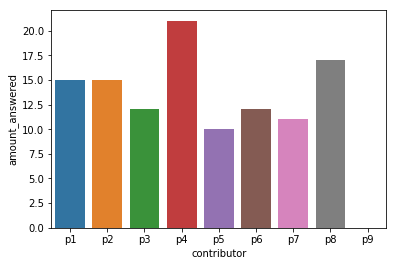

In [5]:
sns.barplot(data=contri_df, y=contri_df['amount_answered'], x=contri_df['contributor'])

## Expected composition of resolution of tasks:

* Lucas    - P1: 11 tasks
* Marcos   - P2: 11 tasks
* Diego    - P3: 10 tasks
* Isabelly - P4: 11 tasks
* Anderson - P5: 10 tasks
* Wesley   - P6: 10 tasks
* Jaziel   - P7: 10 tasks 
* MatheusB - P8: 10 tasks
* MatheusG - P9: 10 tasks

**Total: 93 tasks**

In [6]:
contrib_10 = ['p3','p5','p7','p8','p6','p9']
contrib_11 = ['p1','p2','p4']

def tasks_to_rerun(row):
    if row['contributor'] in contrib_10:
        if len(row['answers']) > 10:
            return row['answers'][10:]
        else:
            return []
    else:
        if row['contributor'] in contrib_11:
            if len(row['answers']) > 11:
                return row['answers'][11:]
            else:
                return []

contri_df['tasks_to_rerun'] = contri_df.apply(lambda row : tasks_to_rerun(row), axis=1)
contri_df['solved_tasks_range'] = contri_df.apply(lambda row : (row['answers'][0], row['answers'][-1]), axis=1)
contri_df

IndexError: ('index 0 is out of bounds for axis 0 with size 0', 'occurred at index 8')

## Tasks To Rerun

In [ ]:
for arr in contri_df.tasks_to_rerun.values:
    print('Tasks to Rerun: {}'.format(arr))

## Count TaskRuns by Task

In [ ]:
cols = ['task_id','id']

df = taskruns[cols].groupby(by='task_id').count()
df.rename(columns={"id" :'count_trs'}, inplace=True)
df.head(10)

## Check All Tasks Have At Least One Answer

In [ ]:
print(set(df.index) - set(range(1628,1720+1,1)))

## Check Answers of Rerunned Tasks

In [ ]:
rerunned_tasks = []
for set_rerunned_tasks in contri_df.tasks_to_rerun.values:
    for rr_task in set_rerunned_tasks:
        rerunned_tasks.append(rr_task)

remaining_tasks = df[(df.index.isin(rerunned_tasks)) & (df.count_trs < 2)]
print(remaining_tasks.shape)
remaining_tasks

## Bug Reports with Missing TaskRuns

In [ ]:
taskruns[taskruns.task_id.isin(remaining_tasks.index)].bug_id

# Making Treatment in Taskruns Answers - Solving Identified Bug in Applications

In [ ]:
display(taskruns[['bug_id','answers']].head())
display(taskruns[['bug_id','answers']].tail())

In [ ]:
new_answers = list(taskruns.answers.values)
new_answers = [new_answers[-1]] + new_answers
del new_answers[-1]
taskruns['new_answers'] = new_answers
taskruns[['bug_id','answers','new_answers']].head()

In [ ]:
features = fd.Datasets.read_features_df()
bugreports = fd.Datasets.read_selected_bugreports_df()

df_3 = pd.DataFrame(columns=features.feat_name.values, 
                    index=bugreports.Bug_Number)

taskruns.sort_values(by='bug_id', inplace=True)

for idx,row in taskruns.iterrows():
    ans = row.new_answers.split(" ")
    for i in range(len(ans)):
        feat_name = df_3.columns[i]
        df_3.at[row.bug_id, feat_name] = int(ans[i])

        
br_2_feat_volunteers_matrix = fd.Feat_BR_Oracles.read_feat_br_volunteers_df()        

print(str(br_2_feat_volunteers_matrix.index.values) == str(df_3.index.values))
    
a1,a2 = [],[]    
for idx,row in br_2_feat_volunteers_matrix.iterrows():
    for col in br_2_feat_volunteers_matrix.columns:
        a1.append(df_3.at[idx,col])
        a2.append(br_2_feat_volunteers_matrix.at[idx,col])

print(cohen_kappa_score(a1, a2))

df_3.index.names = ['bug_number']

display(br_2_feat_volunteers_matrix.head(10))
display(df_3.head(10))

df_3.to_csv('../data/mozilla_firefox_v2/firefoxDataset/oracle/output/firefox_v2/feat_br/br_2_feature_matrix_volunteers_2_2.csv')